# Mini-Projet : Rétrogradation de Mars - Compte-rendu

## I. Introduction

Les systèmes chaotiques présentent une **extrême sensibilité** à leurs **conditions intitiales** : une perturbation minime de ces dernières sur un système dynamique suffit à modifier de façon conséquente son évolution temporelle. C'est ce comportement que nous allons illustrer tout au long de ce TP, par le biais du système chaotique le plus connu : l'**équation logistique**, régissant par exemple l'évolution d'une population dont la quantité de nourriture est limitée. 

Avant de débuter l'exercice de modélisation, il est nécessaire de rappeler les formules et informations clés du problème.


### a) Présentation mathématique du problème


Nous supposons que cette équation modélise une population de lapins, notée $n_i$ pour une année $i$ donnée, et dont le nombre de petits par portée annuelle est défini par la constante $\alpha$. Alors, $n_{i+1} = \alpha n_i$, d'où, à l'année $p$ :

$$ n_p = \alpha^p n_0 $$

La population de lapins croît exponentiellement. Cependant, comme la quantité finie de ressources va **limiter cette croissance**, $\alpha$ ne peut pas être une constante : elle doit être **fonction** de $n_i$ ainsi que d'autres paramètres. Notons $r$ le **taux de croissance maximal** et $n_{\max}$ le nombre maximal de lapins qu'il peut exister. Le coefficient $\alpha$ pourrait dès lors s'écrire :

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

D'où :

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

En posant $x_i = n_i / n_{\max}$, nous avons donc :

$$ x_{i+1} = r (1-x_i)x_i $$

Afin de caractériser cette équation dite **logistique**, nous introduisons la fonction

$$ f(x) = r (1-x) x $$

dont le seul paramètre est $r$, compris entre 1 et 4, et telle que

$$ x_{i+1} = f(x_i) $$


### b) Diagramme de bifurcation

Un **diagramme de bifurcation** permet d'illustrer la ou les limites de la suite des $x_i$, définie par l'équation logistique, en fonction de la valeur du paramètre $r$.
Pour cela, il suffit de calculer un très grand nombre de termes de la suite pour tous r compris dans un intervalle donné, et de ne garder uniquement que les 100 derniers termes, afin de faire l'approximation d'une proximité à la limite. Si la limite est bien définie, ces 100 derniers termes devraient être très semblables, ce qui n'est pas toujours le cas.


### c) Exposant de Lyapunov

Nous avons expliqué ci-dessus que le caractère chaotique d'un système dynamique tient aux conséquences extrêmes d'une perturbation minime sur les conditions initiales. Mathématiquement, cela signifie que la distance entre deux solutions va augmenter de manière **exponentielle** en fonction de $r$ :

$$ e^{t \lambda(r)} $$

où l'expression de $\lambda(r)$ est

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Lorsque $\lambda$ est une fonction à valeur négative, la suite associée à l'équation logistique est **convergente**. À l'inverse, pour les valeurs positives de $\lambda$, la suite **diverge**.

## II. Comportement de la suite

Représentons graphiquement le comportement de la suite pour quelques valeurs de $r$, comprises entre 2.5 et 4, et $x_0=0.1$. 

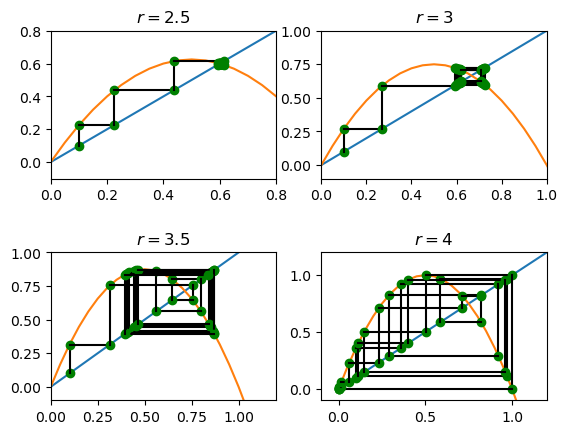

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0.1
N = 20
x = np.arange(0, 10.1, 0.05)
r = np.array([2.5, 3, 3.5, 4])

def f(x, r):
    return r*(1-x)*x


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Nous traçons la bissectrice en fonction de f, et initialisons la récurrence pour tous les subplots
ax1.plot(x, x)
ax1.plot(x, f(x, r[0]))
ax1.plot(x0, x0, 'og')

ax2.plot(x, x)
ax2.plot(x, f(x, r[1]))
ax2.plot(x0, x0, 'og')

ax3.plot(x, x)
ax3.plot(x, f(x, r[2]))
ax3.plot(x0, x0, 'og')

ax4.plot(x, x)
ax4.plot(x, f(x, r[3]))
ax4.plot(x0, x0, 'og')

# Récurrence pour tous les subplots
for i in range(N):
    x1 = f(x0, r[0])
    ax1.plot([x0, x0], [x0, x1], 'k')
    ax1.plot([x0], [x1], 'og')
    ax1.plot([x0, x1], [x1, x1], 'k')
    ax1.plot([x1], [x1], 'og')
    x0 = x1
ax1.set_title("$r=2.5$")
    
x0 = 0.1
for i in range(N):
    x1 = f(x0, r[1])
    ax2.plot([x0, x0], [x0, x1], 'k')
    ax2.plot([x0], [x1], 'og')
    ax2.plot([x0, x1], [x1, x1], 'k')
    ax2.plot([x1], [x1], 'og')
    x0 = x1
ax2.set_title("$r=3$")

x0 = 0.1
for i in range(N):
    x1 = f(x0, r[2])
    ax3.plot([x0, x0], [x0, x1], 'k')
    ax3.plot([x0], [x1], 'og')
    ax3.plot([x0, x1], [x1, x1], 'k')
    ax3.plot([x1], [x1], 'og')
    x0 = x1
ax3.set_title("$r=3.5$")

x0 = 0.1
for i in range(N):
    x1 = f(x0, r[3])
    ax4.plot([x0, x0], [x0, x1], 'k')
    ax4.plot([x0], [x1], 'og')
    ax4.plot([x0, x1], [x1, x1], 'k')
    ax4.plot([x1], [x1], 'og')
    x0 = x1
ax4.set_title("$r=4$")

# Nous délimitons les axes de chaque graphe.
ax1.set_xlim(0,0.8)
ax1.set_ylim(-0.1,0.8)

ax2.set_xlim(0,1)
ax2.set_ylim(-0.1,1)

ax3.set_xlim(0,1.2)
ax3.set_ylim(-0.1,1)

ax4.set_xlim(-0.1,1.2)
ax4.set_ylim(-0.1,1.2)

plt.subplots_adjust(hspace=0.5)

plt.show()

Nous observons que pour $r \in [2.5 ; 3]$, la suite tend vers une limite **finie**. Cependant, pour $r \in ]3 ; 4]$, la suite semble être **instable** : nous pouvons par exemple constater, pour $r=4$, qu'elle oscille entre des valeurs comprises entre 0 et 1, sans jamais converger vers l'une d'entre elle.

## III. Diagramme de bifurcation

Nous souhaitons étudier la ou les limites, lorsqu'elles existent, de la suite des $x_i$ en fonction de la valeur de $r$, par le biais d'un **diagramme de bifurcation**.
Pour ce faire, nous allons choisir comme conditions initiales un grand nombre de valeurs de $r$, extraites de son intervalle, et $x_0=0.00001$. Nous allons calculer, pour chaque valeur de $r$, les 1000 premiers termes de $x_i$, et garder uniquement les 100 derniers termes (approximation de la limite). Si la limite est bien définie, ces 100 derniers termes devraient être **très semblables**, ce qui n'est pas toujours le cas.

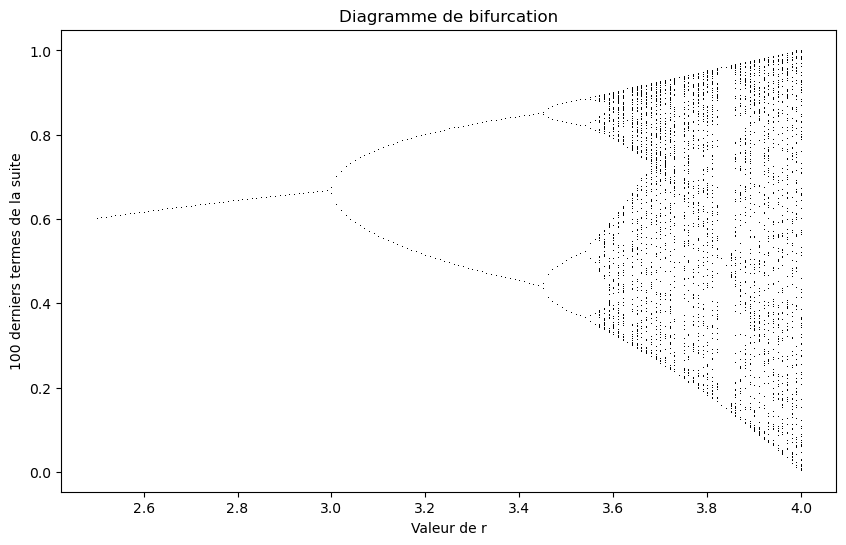

In [3]:
# Nous définissons la condition initiale x0
x0 = 0.00001

# Nous génèrons un grand nombre de valeurs de r
r = np.linspace(2.5, 4, 151)

resultats = np.zeros((100, r.size))

for i in range(r.size):
    x = x0
    temp = np.zeros(1000)
    temp[0] = x
    for j in range(1, 1000):
        x = f(x, r[i])
        temp[j] = x
    resultats[:, i] = temp[-100:] # Nous ne sélectionnons que les 100 derniers termes de la suite

plt.figure(figsize=(10, 6))
for i in range(resultats.shape[0]):
    plt.plot(r, resultats[i, :], ',k')

plt.title('Diagramme de bifurcation')
plt.xlabel('Valeur de r')
plt.ylabel('100 derniers termes de la suite')
plt.show()

Nous observons en effet que la limite de l'équation logistique **dépend** bien du paramètre $r$ : comme observé plus tôt, la limite est unique pour $r \in [2.5\, ; \, 3]$, puis double, puis quadruple, et ainsi de suite avec l'augmentation de la valeur de $r$.
Comme une des conditions initiales influe sur la convergence de la suite, nous sommes en droit de nous demander s'il en est de même selon la valeur de $x_0$.

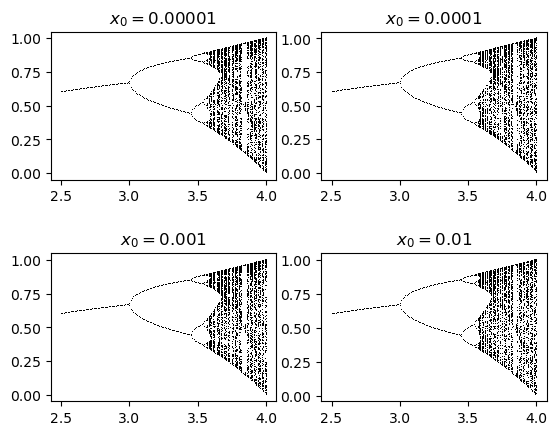

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Nous sélectionnons plusieurs valeurs de x0
x0 = np.array([0.00001, 0.0001, 0.001, 0.01])
N = x0.size

# Nous répètons le code précédent pour chaque subplot

for i in range(r.size):
    x = x0[0]
    temp = np.zeros(1000)
    temp[0] = x
    for j in range(1, 1000):
        x = f(x, r[i])
        temp[j] = x
    resultats[:, i] = temp[-100:]

for i in range(resultats.shape[0]):
    ax1.plot(r, resultats[i, :], ',k')
ax1.set_title("$x_0=0.00001$")



for i in range(r.size):
    x = x0[1]
    temp = np.zeros(1000)
    temp[0] = x
    for j in range(1, 1000):
        x = f(x, r[i])
        temp[j] = x
    resultats[:, i] = temp[-100:]

for i in range(resultats.shape[0]):
    ax2.plot(r, resultats[i, :], ',k')
ax2.set_title("$x_0=0.0001$")



for i in range(r.size):
    x = x0[2]
    temp = np.zeros(1000)
    temp[0] = x
    for j in range(1, 1000):
        x = f(x, r[i])
        temp[j] = x
    resultats[:, i] = temp[-100:]

for i in range(resultats.shape[0]):
    ax3.plot(r, resultats[i, :], ',k')
ax3.set_title("$x_0=0.001$")



for i in range(r.size):
    x = x0[3]
    temp = np.zeros(1000)
    temp[0] = x
    for j in range(1, 1000):
        x = f(x, r[i])
        temp[j] = x
    resultats[:, i] = temp[-100:]

for i in range(resultats.shape[0]):
    ax4.plot(r, resultats[i, :], ',k')
ax4.set_title("$x_0=0.01$")



plt.subplots_adjust(hspace=0.5)
plt.show()

Nous constatons, en comparant les 4 diagrammes, que la valeur de $x_0$ **n'influence pas** la convergence de la suite. Seule la valeur de $r$ est déterminante dans la convergence de la suite.

## IV. Exposant de Lyapunov

Calculons, pour chacune des valeurs de $r \in [2.5\, ; \, 4]$ uniformément distribuées, la valeur de l'exposant de Lyapunov, puis traçons sur un graphique un point pour chacun des couples $(r, \lambda)$ obtenus. Pour rendre le graphique plus lisible, nous traçons un point **noir** lorsque $\lambda < 0$, un point **rouge** lorsque $\lambda > 0$, et une ligne horizontale **bleue** pour $\lambda = 0$ afin de marquer la différence entre les valeurs stables et instables de $\lambda$.

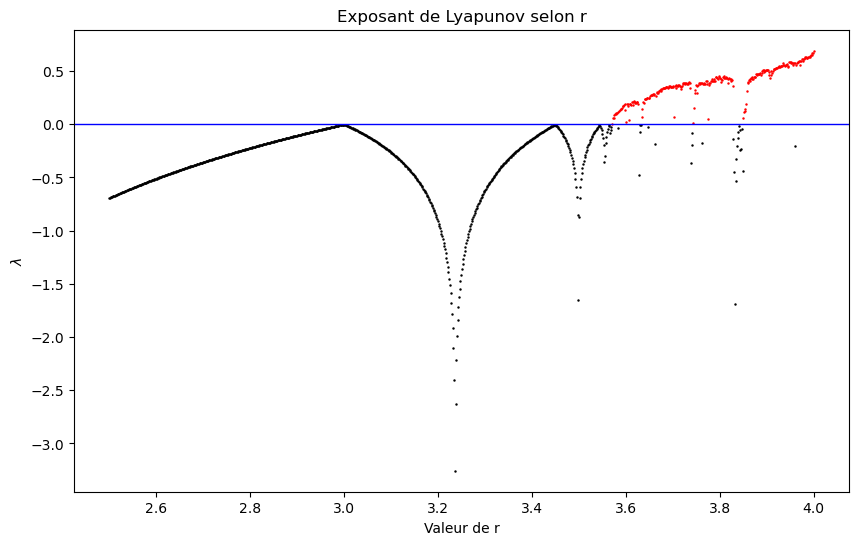

In [6]:
# Nous génèrons un nombre de valeurs de r plus élevé
r_values = np.linspace(2.5, 4, 1000)
N = 1000       # Nombre total d'itérations
M = 100        # Nombre d'itérations à ignorer

# Nous initialisons
x = 0.1 * np.ones_like(r_values)
lyapunov = np.zeros_like(r_values)


# Nous calculons l'exposant de Lyapunov
for _ in range(N + M):
    x = f(x, r_values)
    if _ >= M:  # Nous ignorons le transitoire afin de ne garder que les termes "proches" de la limite (s'il y en a une)
        derivative = r_values * (1 - 2 * x)  # Dérivée de f
        lyapunov += np.log(np.abs(derivative))

lyapunov /= N


plt.figure(figsize=(10, 6))

# Nous traçons les valeurs négatives en noir
plt.plot(r_values[lyapunov < 0], lyapunov[lyapunov < 0], '.k', alpha=1, markersize = 1.5)

# Nous traçons les valeurs positives en rouge
plt.plot(r_values[lyapunov >= 0], lyapunov[lyapunov >= 0], '.r', alpha=1, markersize = 1.5)

# Nous traçons une ligne horizontale d'équation lambda = 0.
plt.axhline(0, color='blue', linewidth = 1)
plt.xlabel('Valeur de r')
plt.ylabel('$\\lambda$')
plt.title('Exposant de Lyapunov selon r')
plt.show()

En observant le graphe ci-dessus, nous en déduisons que la suite associée à l'équation logistique **converge** pour $r$ entre 2.5 et environ 3.6, et **diverge** pour $r>3.6$.
En comparant ces résultats avec le diagramme de bifurcation, nous pouvons conclure sur la convergence de la suite en fonction de $r$ :

- Pour $r \leq 3$, la suite **converge** vers **une seule** valeur stable, reflétant un équilibre prévisible ;  
- Lorsque $r$ dépasse 3, des bifurcations successives apparaissent, conduisant à des **oscillations périodiques** de plus en plus complexes ;
- Pour $r > 3.6$, le système devient clairement **chaotique**, avec une **absence de convergence** et une forte **dépendance** aux conditions initiales, comme le confirme l’exposant de Lyapunov positif. 


## Conclusion

Ce mini-projet nous a permis d’explorer le comportement chaotique de l’équation logistique $x_{i+1} = r(1 - x_i)x_i$, illustrant ainsi la **sensibilité** aux conditions initiales et aux paramètres, caractéristique des systèmes dynamiques non linéaires. Les simulations numériques ont révélé des **régimes distincts** en fonction de $r$.
Le diagramme de bifurcation a synthétisé ces transitions, mettant en évidence la **richesse des dynamiques** générées par une équation simple.
Ce TP confirme que le chaos, bien que **déterministe**, échappe à la prédiction **à long terme**.